In [41]:
import pymaid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import logging
from itertools import chain, combinations

In [2]:
rm = pymaid.CatmaidInstance(
    server="https://catmaid.jekelylab.ex.ac.uk/#",
    project_id=11,
    api_token=None,
    http_user=None,
    http_password=None,
)
logging.getLogger("pymaid").setLevel(logging.WARNING)
pymaid.clear_cache()

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [6]:
# category can be "side" or "type" or "segment"
def get_labels_from_annotation(annot_list, category="side"):
    all_ids = pymaid.get_skids_by_annotation(annot_list)

    # power set of annot_list reversed: first look at the intersections within annot_list then singular entries
    annot_power = list(
        chain.from_iterable(
            combinations(annot_list, r) for r in range(len(annot_list) + 1)
        )
    )
    annot_power.reverse()

    id_annot = []
    for annots in annot_power:

        # skip the empty set in the power set
        if len(annots) != 0:
            ids = pymaid.get_skids_by_annotation(annots, intersect=True)

            # assign label to every id
            for id in ids:
                if id in all_ids:
                    # make sure cannot find id again if it is already added to id_list
                    all_ids.remove(id)
                    label = ""
                    for annot in annots:
                        if category == "side":
                            label += annot[0]
                        elif category == "type":
                            label += annot[0].lower()
                        elif category == "segment":
                            label += annot[-1]
                        else:
                            raise ValueError("category is invalid")
                    id_annot.append([id, label])

    id_annot = np.array(id_annot)

    ids = id_annot[:, 0]
    annots = id_annot[:, 1]
    return pd.Series(index=ids, data=annots, name=category)

In [7]:
side_list = ["left", "right", "center"]
type_list = ["Sensory neuron", "interneuron", "motorneuron"]
segment_list = ["segment_0", "segment_1", "segment_2", "segment_3"]

side_labels = get_labels_from_annotation(side_list, category="side")
type_labels = get_labels_from_annotation(type_list, category="type")
segment_labels = get_labels_from_annotation(segment_list, category="segment")

series_ids = [side_labels, type_labels, segment_labels]
annotations = pd.concat(series_ids, axis=1, ignore_index=False, names="ID").fillna(
    "N/A"
)

Fetching:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
annotations

,side,type,segment
1343291,rc,N/A,N/A
1332516,rc,s,N/A
1402724,rc,N/A,3
1462664,rc,N/A,2
84457,rc,N/A,N/A
...,...,...,...
2256298,N/A,N/A,1
2256326,N/A,N/A,1
2256339,N/A,N/A,1
1602239,N/A,N/A,1


dict_keys(['rc', 'lc', 'lr', 'c', 'r', 'l'])
dict_values([11, 10, 5, 2, 4498, 4635])


Text(0, 0.5, '# of Neurons')

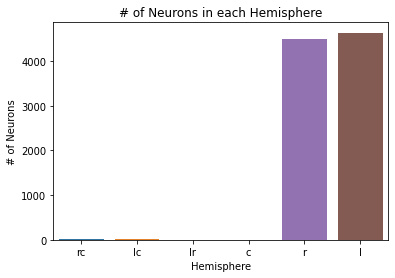

In [49]:
#print number of neurons in each hemisphere
hemis = {}
hemi_list = list(annotations["side"])
for i in range(len(hemi_list)):
    if hemi_list[i] == "N/A":
        continue
    
    if hemi_list[i] not in hemis:
        hemis[hemi_list[i]] = 1
    
    else:
        hemis[hemi_list[i]] += 1
print(hemis.keys())
print(hemis.values())
sns.barplot(x=list(hemis.keys()), y=list(hemis.values())) 
plt.title("# of Neurons in each Hemisphere")
plt.xlabel("Hemisphere")
plt.ylabel("# of Neurons")
    
    

Text(0, 0.5, '# of Neurons')

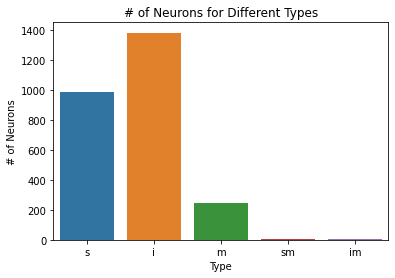

In [51]:
#print number of neurons for different types
types = {}
type_list = list(annotations["type"])

for i in range(len(type_list)):
    if type_list[i] == "N/A":
        continue
    
    if type_list[i] not in types:
        types[type_list[i]] = 1
    
    else:
        types[type_list[i]] += 1

sns.barplot(x=list(types.keys()), y=list(types.values())) 
plt.title("# of Neurons for Different Types")
plt.xlabel("Type")
plt.ylabel("# of Neurons")

Text(0, 0.5, '# of Neurons')

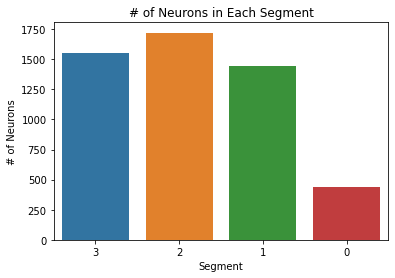

In [52]:
#print number of neurons in different segments
segments = {}
segment_list = list(annotations["segment"])

for i in range(len(segment_list)):
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segments:
        segments[segment_list[i]] = 1
    
    else:
        segments[segment_list[i]] += 1

sns.barplot(x=list(segments.keys()), y=list(segments.values())) 
plt.title("# of Neurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Neurons")

Text(0, 0.5, '# of Sensory Neurons')

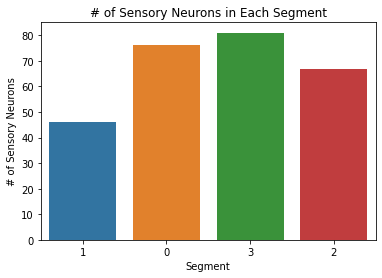

In [60]:
#print number of sensory neurons in each segment

indices = []
segment_sensory = {}
for i in range(len(type_list)):
    if(type_list[i] == "s"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_sensory:
        segment_sensory[segment_list[i]] = 1
    
    else:
        segment_sensory[segment_list[i]] += 1

sns.barplot(x=list(segment_sensory.keys()), y=list(segment_sensory.values())) 
plt.title("# of Sensory Neurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Sensory Neurons")

Text(0, 0.5, '# of Interneurons')

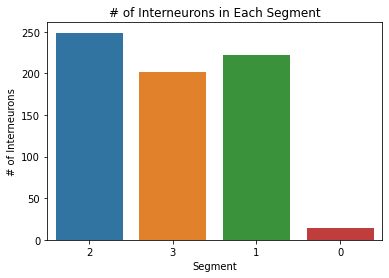

In [54]:
#print number of interneurons in each segment

indices = []
segment_inter = {}
for i in range(len(type_list)):
    if(type_list[i] == "i"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_inter:
        segment_inter[segment_list[i]] = 1
    
    else:
        segment_inter[segment_list[i]] += 1

sns.barplot(x=list(segment_inter.keys()), y=list(segment_inter.values())) 
plt.title("# of Interneurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Interneurons")

Text(0, 0.5, '# of Motorneurons')

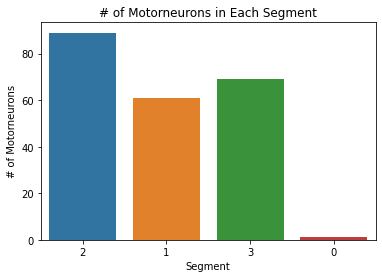

In [56]:
#print number of motorneurons in each segment

indices = []
segment_motor = {}
for i in range(len(type_list)):
    if(type_list[i] == "m"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_motor:
        segment_motor[segment_list[i]] = 1
    
    else:
        segment_motor[segment_list[i]] += 1
        
sns.barplot(x=list(segment_motor.keys()), y=list(segment_motor.values())) 
plt.title("# of Motorneurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Motorneurons")

In [57]:
celltypes = []
num_neurons = []
celltypes_count = {}
for i, digit in enumerate(range(1, 181)):
   celltypes.append("celltype{}".format(str(digit)))
   num_neurons.append(len(pymaid.get_skids_by_annotation(celltypes[i])))
   celltypes_count[celltypes[i]] = [num_neurons[i]]

df = pd.DataFrame(celltypes_count, index=["# of neurons"])
print(df)

              celltype1  celltype2  celltype3  celltype4  celltype5  \
# of neurons         24         11          4          2          4   

              celltype6  celltype7  celltype8  celltype9  celltype10  ...  \
# of neurons          4          4          2          1           1  ...   

              celltype171  celltype172  celltype173  celltype174  celltype175  \
# of neurons            4            2            4            2            2   

              celltype176  celltype177  celltype178  celltype179  celltype180  
# of neurons            2            2            4            1            2  

[1 rows x 180 columns]


In [58]:
cellgroups = []
num_neurons = []
cellgroups_count = {}
for i, digit in enumerate(range(1, 19)):
   cellgroups.append("cellgroup{}".format(str(digit)))
   num_neurons.append(len(pymaid.get_skids_by_annotation(cellgroups[i])))
   cellgroups_count[cellgroups[i]] = [num_neurons[i]]

df = pd.DataFrame(cellgroups_count, index=["# of neurons"])
print(df)

              cellgroup1  cellgroup2  cellgroup3  cellgroup4  cellgroup5  \
# of neurons         111          55         114          37          55   

              cellgroup6  cellgroup7  cellgroup8  cellgroup9  cellgroup10  \
# of neurons          25         114          27          76           66   

              cellgroup11  cellgroup12  cellgroup13  cellgroup14  cellgroup15  \
# of neurons           12           68           32            6           88   

              cellgroup16  cellgroup17  cellgroup18  
# of neurons           61           52           15  


In [59]:
celltypes_non_neuronal = []
num_neurons = []
celltypes_non_neuronal_count = {}
for i, digit in enumerate(range(1, 91)):
   celltypes_non_neuronal.append("celltype_non_neuronal{}".format(str(digit)))
   num_neurons.append(len(pymaid.get_skids_by_annotation(celltypes_non_neuronal[i])))
   celltypes_non_neuronal_count[celltypes_non_neuronal[i]] = [num_neurons[i]]

df = pd.DataFrame(celltypes_non_neuronal_count, index=["# of neurons"])
print(df)

              celltype_non_neuronal1  celltype_non_neuronal2  \
# of neurons                       8                       1   

              celltype_non_neuronal3  celltype_non_neuronal4  \
# of neurons                      23                       6   

              celltype_non_neuronal5  celltype_non_neuronal6  \
# of neurons                       8                      34   

              celltype_non_neuronal7  celltype_non_neuronal8  \
# of neurons                       4                      16   

              celltype_non_neuronal9  celltype_non_neuronal10  ...  \
# of neurons                      24                        2  ...   

              celltype_non_neuronal81  celltype_non_neuronal82  \
# of neurons                        8                        6   

              celltype_non_neuronal83  celltype_non_neuronal84  \
# of neurons                        4                        4   

              celltype_non_neuronal85  celltype_non_neuronal86  \
# of neuron